# Small Image Classification Using Convolutional Neural Network (CNN)
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

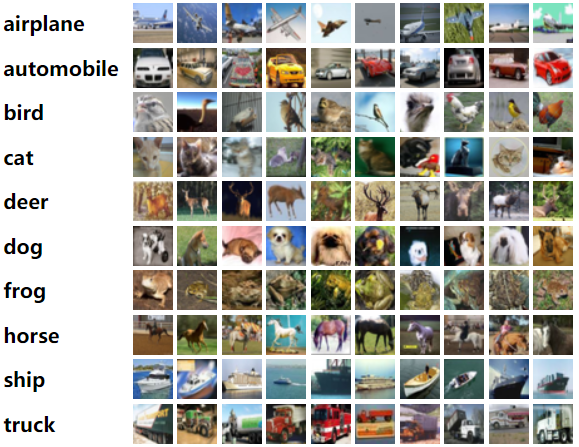

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 184s 1us/step


(50000, 32, 32, 3)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

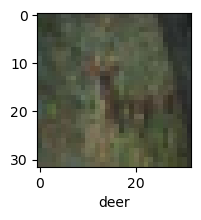

In [15]:
plot_sample(X_train, y_train, 10)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification


In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Metal device set to: Apple M1


2022-09-19 10:51:07.506091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-19 10:51:07.507681: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-09-19 10:51:09.332446: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-19 10:51:09.597354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 14ms/step - loss: 1.8162 - accuracy: 0.3548
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6266 - accuracy: 0.4241
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5452 - accuracy: 0.4537
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4854 - accuracy: 0.4780
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4345 - accuracy: 0.4943
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3915 - accuracy: 0.5093
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3537 - accuracy: 0.5238
Epoch 8/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3196 - accuracy: 0.5377
Epoch 9/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.2869 - accuracy: 0.5503
Epoch 10/10
1563/1563 [==============================] - 21s 14ms/step - lo

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

 32/313 [==>...........................] - ETA: 1s

2022-09-19 10:55:05.473099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.40      0.51      1000
           1       0.62      0.67      0.65      1000
           2       0.54      0.22      0.31      1000
           3       0.32      0.38      0.35      1000
           4       0.53      0.32      0.40      1000
           5       0.40      0.43      0.42      1000
           6       0.40      0.76      0.53      1000
           7       0.71      0.44      0.55      1000
           8       0.58      0.71      0.63      1000
           9       0.49      0.68      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.49     10000
weighted avg       0.53      0.50      0.49     10000



# Now let us build a convolutional neural network to train our images

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
early=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [27]:
cnn.fit(X_train, y_train, epochs=100,callbacks=[early])

Epoch 1/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2963 - accuracy: 0.5377
Epoch 2/100
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0942 - accuracy: 0.6162
Epoch 3/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9839 - accuracy: 0.6576
Epoch 4/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9148 - accuracy: 0.6819
Epoch 5/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8576 - accuracy: 0.7031
Epoch 6/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8067 - accuracy: 0.7209
Epoch 7/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7707 - accuracy: 0.7324
Epoch 8/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7338 - accuracy: 0.7457
Epoch 9/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7030 - accuracy: 0.7557
Epoch 10/100
1563/1563 [==============================]

1563/1563 [==============================] - 22s 14ms/step - loss: 0.3975 - accuracy: 0.8584
Epoch 27/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3868 - accuracy: 0.8624
Epoch 28/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3759 - accuracy: 0.8661
Epoch 29/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3676 - accuracy: 0.8681
Epoch 30/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3505 - accuracy: 0.8754
Epoch 31/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3496 - accuracy: 0.8743
Epoch 32/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3305 - accuracy: 0.8809
Epoch 33/100
1563/1563 [==============================] - 21s 13ms/step - loss: 0.3264 - accuracy: 0.8850
Epoch 34/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3162 - accuracy: 0.8867
Epoch 35/100
1563/1563 [==============================] - 2

1563/1563 [==============================] - 20s 13ms/step - loss: 0.2002 - accuracy: 0.9276
Epoch 53/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1976 - accuracy: 0.9278
Epoch 54/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1910 - accuracy: 0.9301
Epoch 55/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1920 - accuracy: 0.9298
Epoch 56/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1850 - accuracy: 0.9322
Epoch 57/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1803 - accuracy: 0.9332
Epoch 58/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1786 - accuracy: 0.9352
Epoch 59/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1744 - accuracy: 0.9359
Epoch 60/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1702 - accuracy: 0.9379
Epoch 61/100
1563/1563 [==============================] - 2

1563/1563 [==============================] - 19s 12ms/step - loss: 0.1291 - accuracy: 0.9542
Epoch 78/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1371 - accuracy: 0.9499
Epoch 79/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1294 - accuracy: 0.9535
Epoch 80/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1278 - accuracy: 0.9544
Epoch 81/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1212 - accuracy: 0.9556
Epoch 82/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1253 - accuracy: 0.9544
Epoch 83/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1291 - accuracy: 0.9542
Epoch 84/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1222 - accuracy: 0.9560
Epoch 85/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1168 - accuracy: 0.9571
Epoch 86/100
1563/1563 [==============================] - 1

In [28]:
y_pred = cnn.predict(X_test)
y_pred[:5]

 27/313 [=>............................] - ETA: 1s

2022-09-19 11:33:26.450779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


array([[5.88911244e-05, 1.36295775e-14, 3.14963272e-16, 1.98042523e-02,
        1.53762992e-15, 2.35213010e-05, 1.26195884e-18, 1.28502586e-19,
        9.80113387e-01, 1.28249867e-18],
       [1.18558381e-08, 3.12725956e-06, 2.16076598e-26, 3.96500981e-20,
        5.32503741e-29, 4.95623138e-30, 0.00000000e+00, 3.57810321e-35,
        9.99996901e-01, 3.02732102e-12],
       [4.05008555e-04, 9.99594986e-01, 1.06960926e-10, 4.71737348e-14,
        9.92002246e-21, 3.23492240e-11, 1.58177965e-14, 3.12459782e-08,
        1.33168028e-08, 3.16176454e-08],
       [8.82141590e-01, 7.09826087e-11, 1.05180100e-01, 8.39206575e-16,
        1.87772975e-09, 2.13571389e-24, 1.41806741e-15, 8.66155934e-16,
        1.26783801e-02, 1.22665220e-16],
       [1.39132261e-26, 3.12441969e-25, 4.61133048e-10, 3.33496291e-06,
        4.06373888e-02, 5.41005185e-10, 9.59359288e-01, 1.47100434e-18,
        1.09551540e-21, 4.12322878e-20]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 1, 0, 6]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

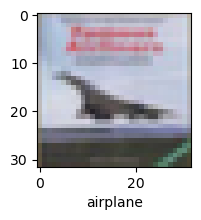

In [31]:
plot_sample(X_test, y_test,3)

In [33]:
import pickle
pickle.dump(cnn, open('model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://072388d8-1365-480a-9c0a-c94fe90b929f/assets


INFO:tensorflow:Assets written to: ram://072388d8-1365-480a-9c0a-c94fe90b929f/assets
